# Task 2: Perform some exploratory data analysis with the given datasets.
The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants me to perform some exploratory data analysis.


#### The data that was sent over includes:

- Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
- Historical pricing data: variable and fixed pricing data etc
- Churn indicator: whether each customer has churned or not

*Sub-Task 1:
Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is to gain a holistic understanding of the dataset.

*Sub-Task 2:
Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to me to define price sensitivity and calculate it.

*Sub-Task 3:
Prepare a half-page summary or slide of key findings and add some suggestions for data augmentation – which other sources of data should the client provide me with and which open source datasets might be useful?

For my final deliverable,the analysis will be submited in the form of a jupyter notebook as well as my half-page summary document.

### Importing the necessary libraries

In [1]:
!pip install missingno
!pip install cufflinks


import numpy as np                # linear algebra
import pandas as pd               # data processing, read CSV file   
import seaborn as sns             # data visualization
import matplotlib.pyplot as plt   # calculate plots
import missingno as msno          # calculate missing value          
import cufflinks as cf
import plotly.graph_objects as go

### Loading Dataset

In [2]:
client_data = pd.read_csv("C:\\Users\\chiaz\\Downloads\\client_data.csv") 
price_data = pd.read_csv("C:\\Users\\chiaz\\Downloads\\price_data.csv")

### Data Reading

In [3]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
print ('Client data shape:',client_data.shape)

Client data shape: (14606, 26)


In [6]:
print ('Price data shape:',price_data.shape)

Price data shape: (193002, 8)


### Data Understanding : client_data

In [7]:
#Obtain database attributes
client_data.columns.values

array(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype=object)

In [8]:
client_data.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [9]:
#Basic information for client_data
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [10]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


### Data Understanding  : price_data

In [11]:
#Obtain database attributes
price_data.columns.values

array(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'], dtype=object)

In [12]:
price_data.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [13]:
#Basic information for price_data
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [14]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


#### Exploratory Data Analysis and Data Cleaning

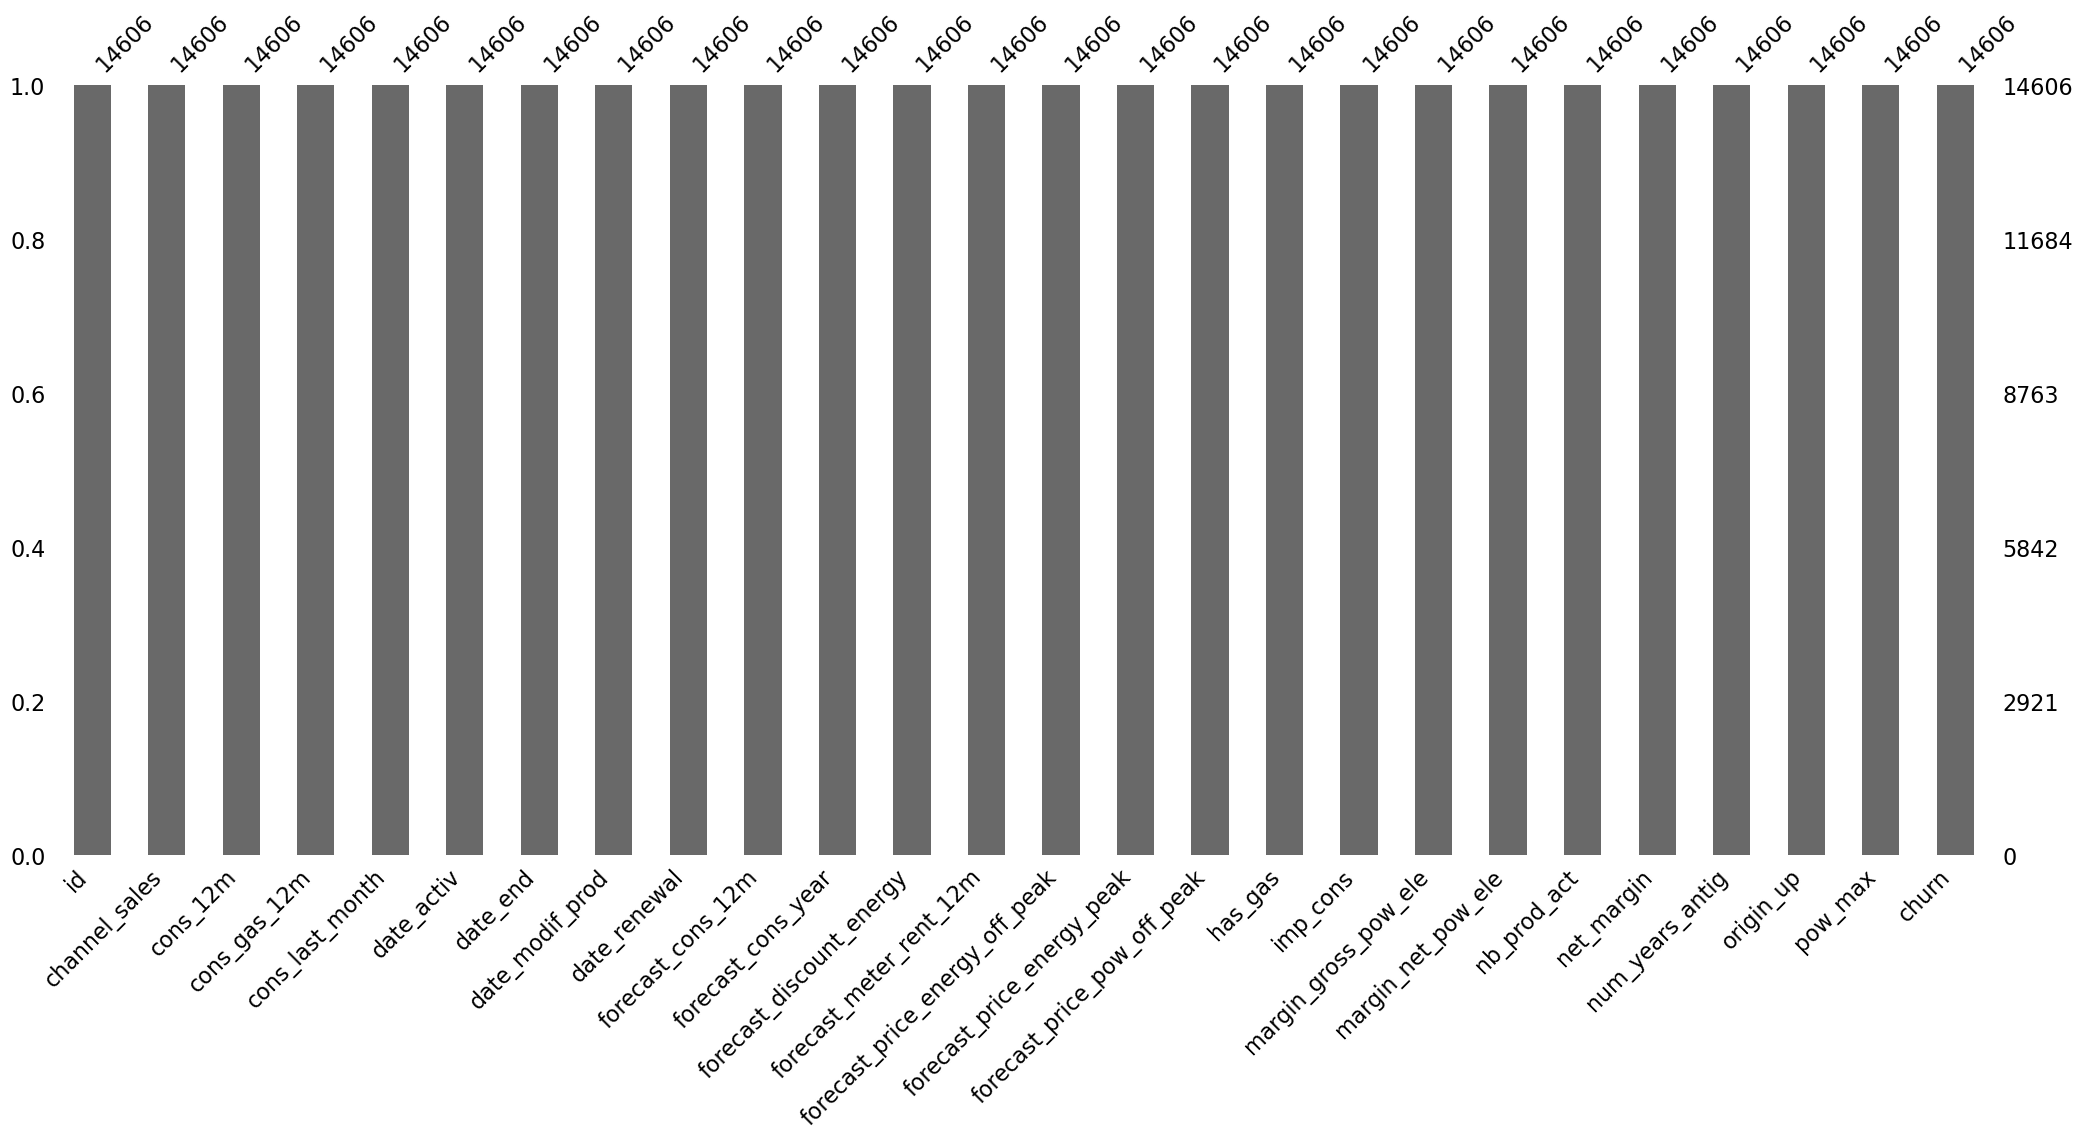

In [15]:
# Visualize missing values as a bar
msno.bar(client_data)
plt.show()

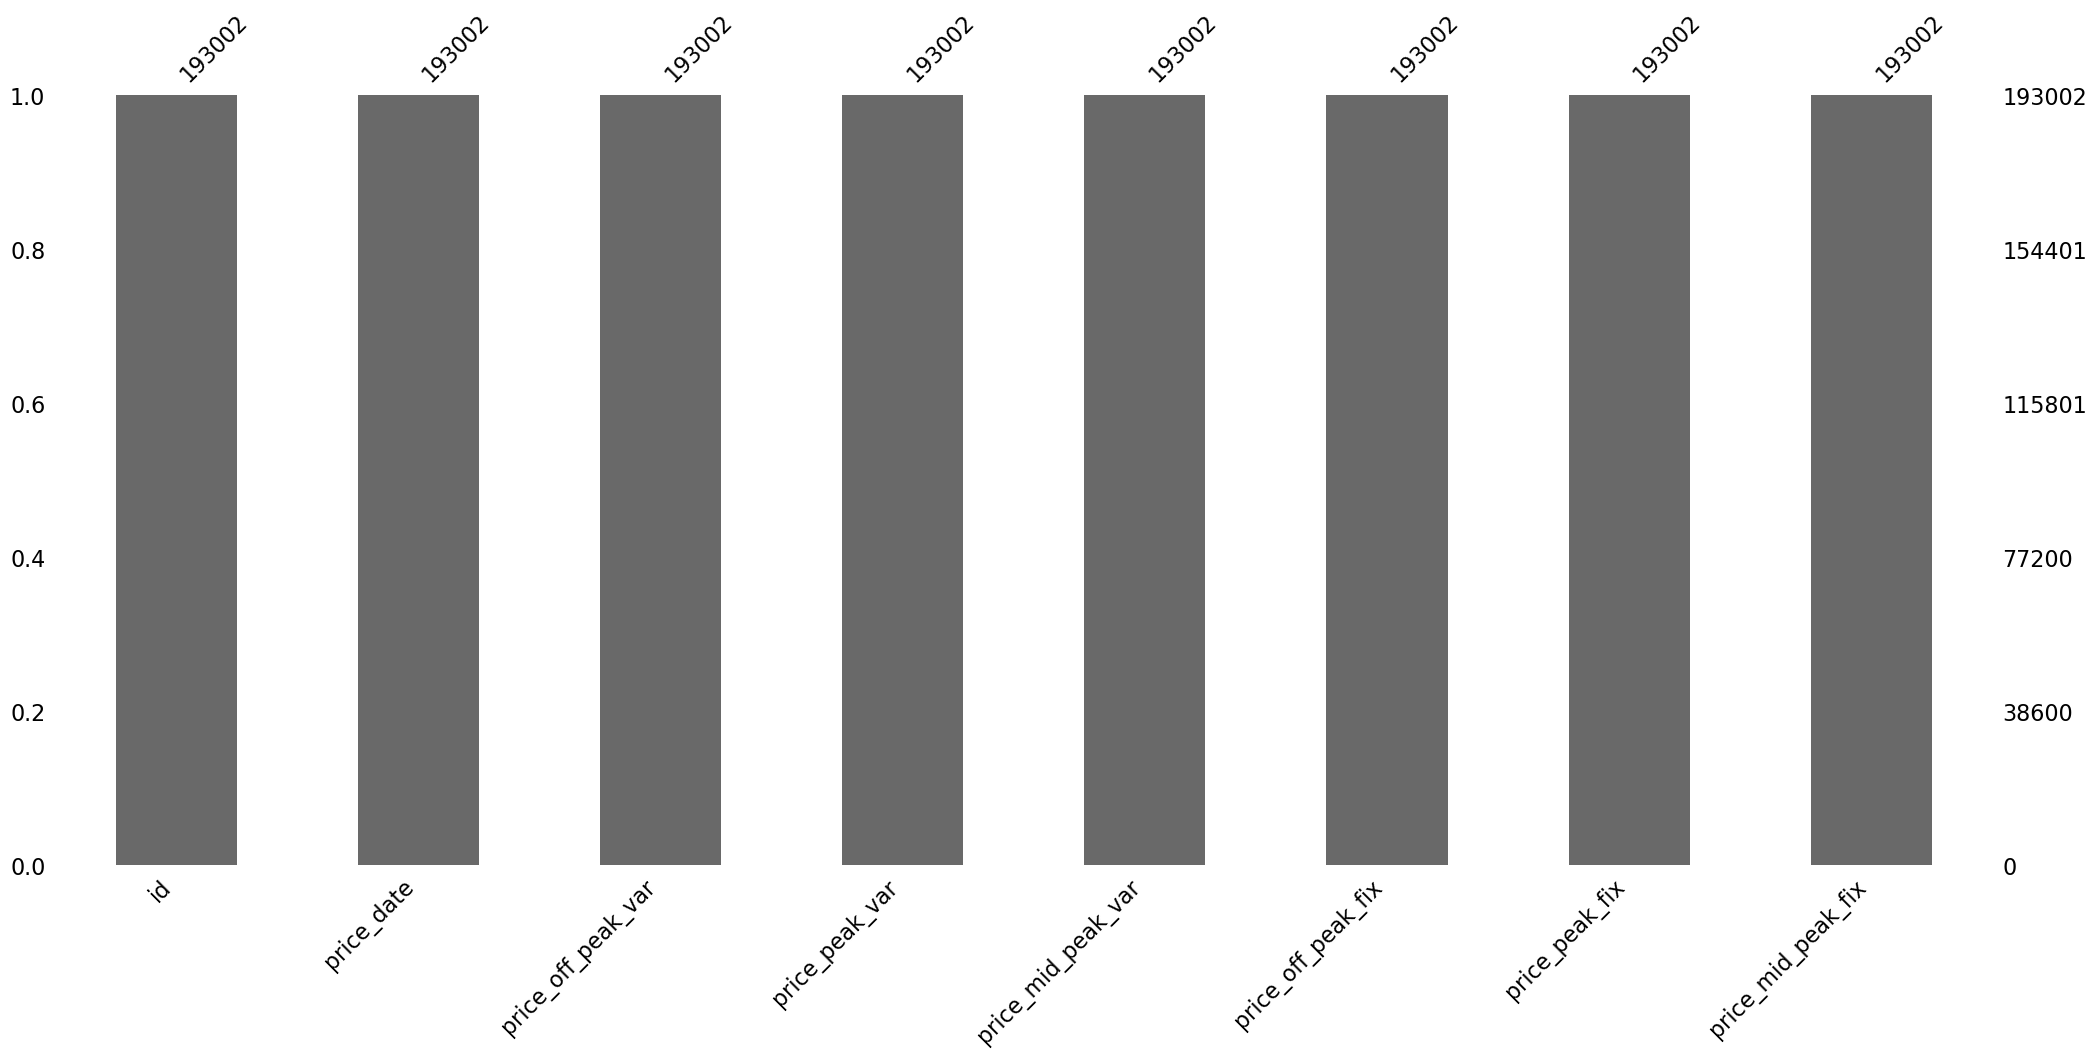

In [16]:
# Visualize missing values as a bar
msno.bar(price_data)
plt.show()

##### No missing value in both client_data & price_data datasets

##### Convert data types

In [17]:
#Noted that the data type for a few date features needed to convert into datetime types
date=['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

for i in date:
    client_data[i] = pd.to_datetime(client_data[i])

In [18]:
price_data['price_date'] = pd.to_datetime(price_data['price_date'])

In [19]:
#Noted that the data type for a few margin features needed to convert into int64 
client_data['margin_gross_pow_ele'] = client_data['margin_gross_pow_ele'].astype(np.int64)
client_data['margin_net_pow_ele'] = client_data['margin_net_pow_ele'].astype(np.int64)
client_data['net_margin'] = client_data['net_margin'].astype(np.int64)

display(client_data.dtypes)

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                       int64
margin_net_pow_ele                         int64
nb_prod_act         

##### Check duplication value

In [20]:
client_data.duplicated().sum()

0

In [21]:
price_data.duplicated().sum()

0

### Data Visualisation

#### Distribution of Churn 

In [22]:
client_data['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

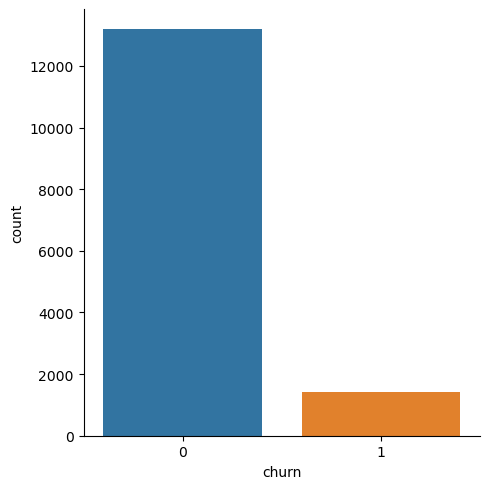

In [23]:
sns.catplot(data=client_data, x='churn', kind='count')

##### Customer Churn Rate

In [24]:
churn = client_data[['id','churn']]
churn.columns = ['companies','churn']
churn_total = churn.groupby(churn['churn']).count()

In [25]:
churn_percentage = churn_total/churn_total.sum()*100
churn_percentage.reset_index()
churn_percentage

,companies
churn,
0,90.284814
1,9.715186


[Text(0, 0, '90.28'), Text(0, 0, '9.71')]

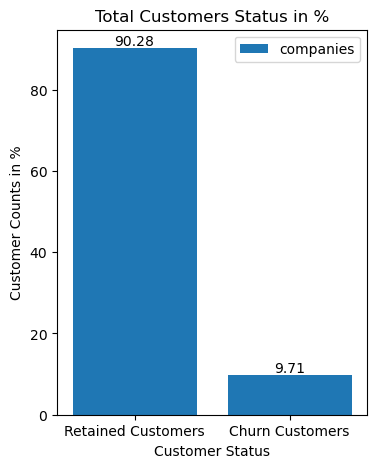

In [26]:
figure, ax = plt.subplots(figsize=(4,5))

# Plot our bar chart with stacked values
churn_companies = ['Retained Customers', 'Churn Customers']
churn_percentage.plot(kind="bar", stacked=True, ax=ax)

#Customise labels
ax.set_ylabel ('Customer Counts in %')
ax.set_xlabel ('Customer Status')
ax.set_xticklabels(churn_companies)
plt.title('Total Customers Status in %')


#Rotate x labels
plt.setp(ax.xaxis.get_majorticklabels(), rotation=360)

#Show percentage on each bar
company_counts = [90.28, 9.71]
bar_container = ax.bar(churn_companies,company_counts)
ax.bar_label(bar_container)

Total % of Retained Companies:90.28% & Churned Companies:9.71%

Result : Nearly 10% of companies churned

##### Distirbution of Energy Consumption

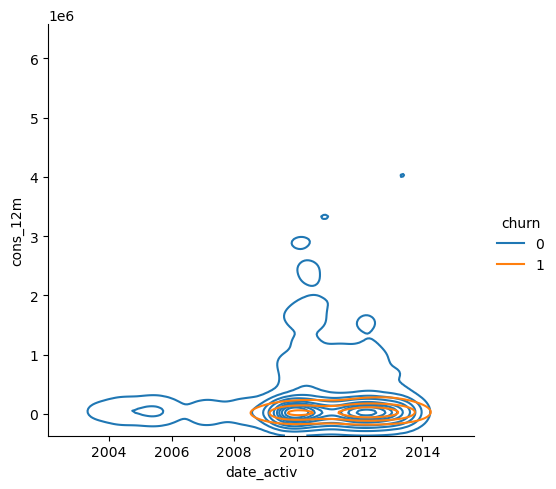

In [27]:
sns.displot(client_data, x = 'date_activ', y= 'cons_12m',kind='kde', hue='churn')

##### From the kde graph above, we can see that customers churn occured between year 2009 to 2014.

#### Energy & Gas Consumption for 12 months of churned or retained company

In [28]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0


In [29]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({'Retain': dataframe[dataframe['churn']==0][column],
    'Churn':dataframe[dataframe['churn']==1][column]})
    
    # Plot the histogram
    temp[['Retain','Churn']].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    
    # X-axis label
    ax.set_xlabel(column)
    
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')
    

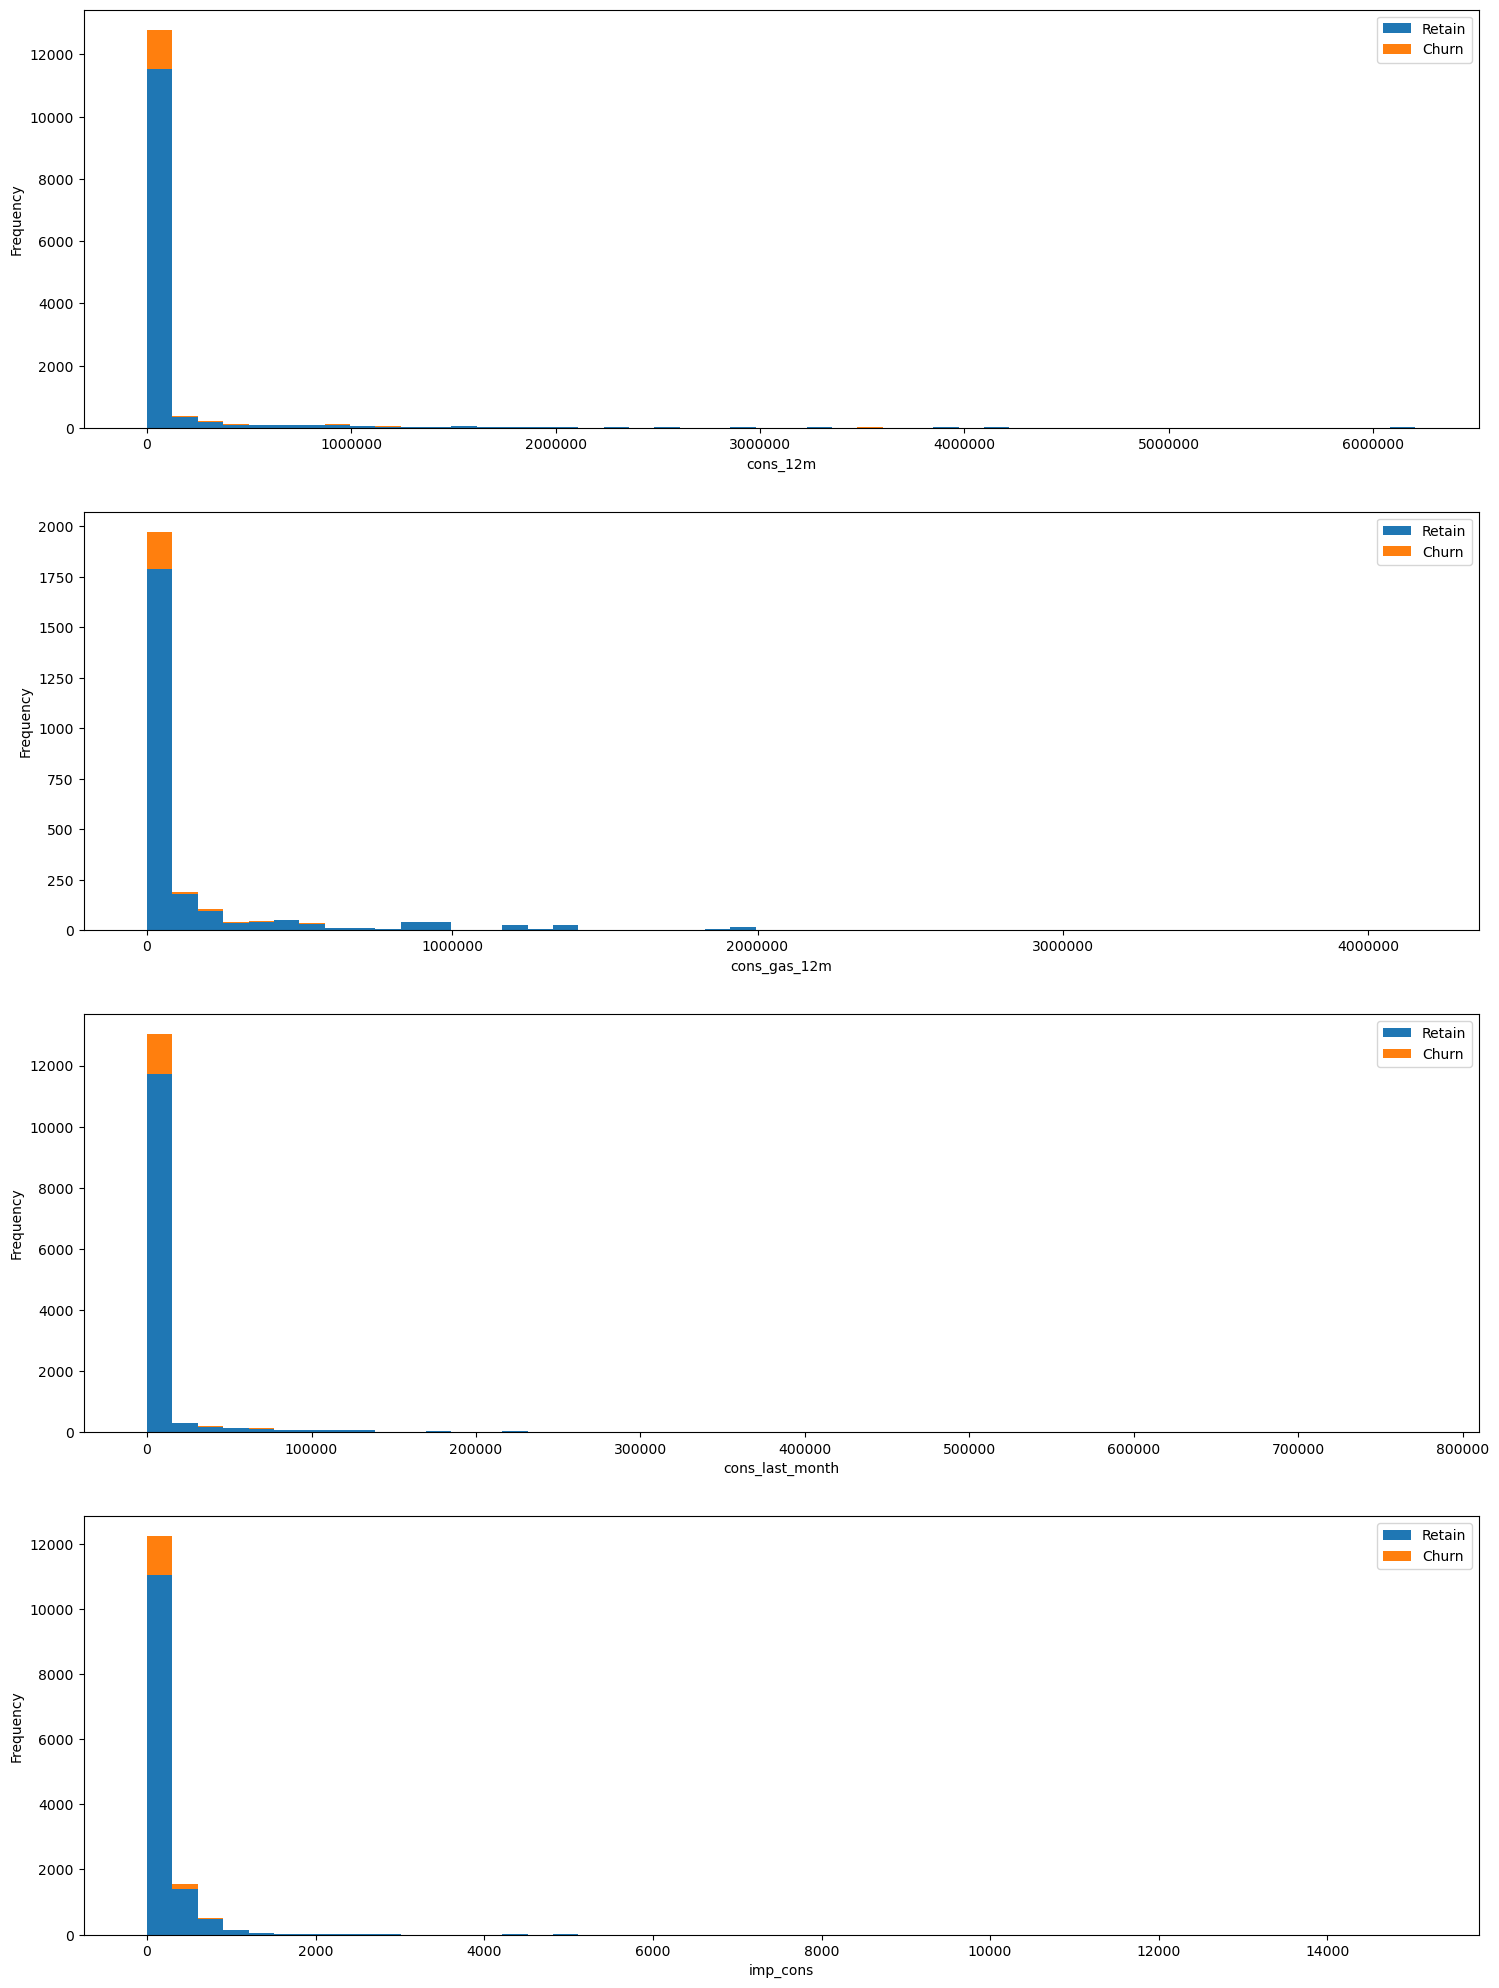

In [30]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

plt.savefig("Distribution of the consumption.png", bbox_inches="tight")

#### Outliner Observation 

C:\Users\chiaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\chiaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\chiaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\chiaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: Future

<AxesSubplot:xlabel='imp_cons'>

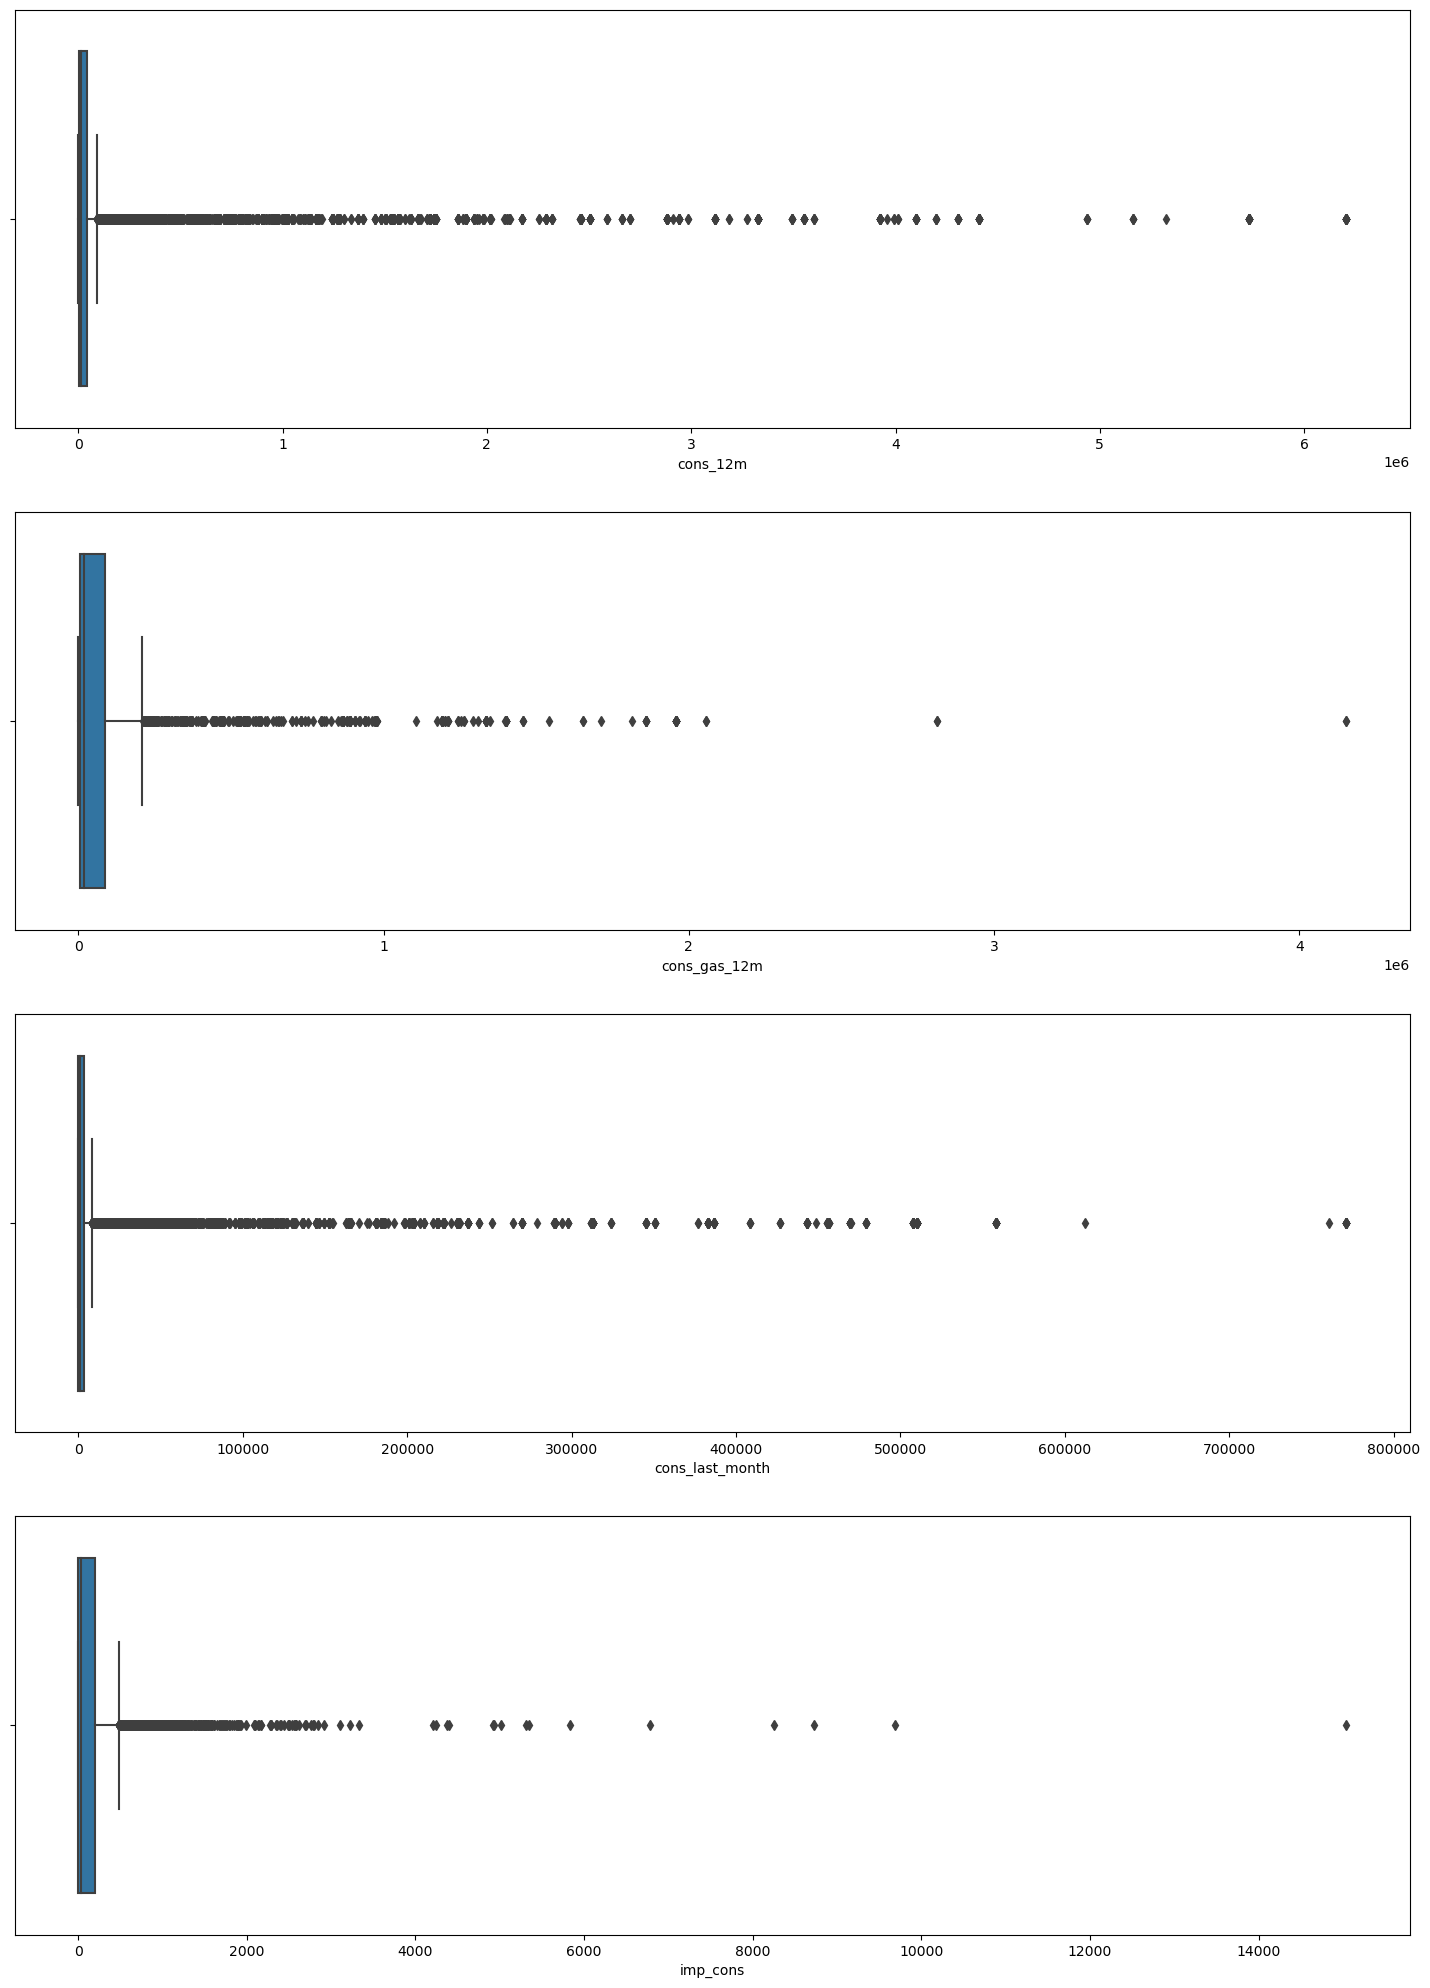

In [31]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])

#####  A boxplot is a graph that gives a good indication of how the values in the data are spread out.  
The box plots above outlined:
* Median
* First Quatile (Q3)
* Third Quatile (Q1)
* Interquatile Range (IQR)
* Outliners (Dots outside Maximum Q3)

###### Plenty of outliners shown in each subplot above. Meaning that significant high of energy consumption, especially cons_last_month.

#### Forecast

In [32]:
forecast_data = client_data[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

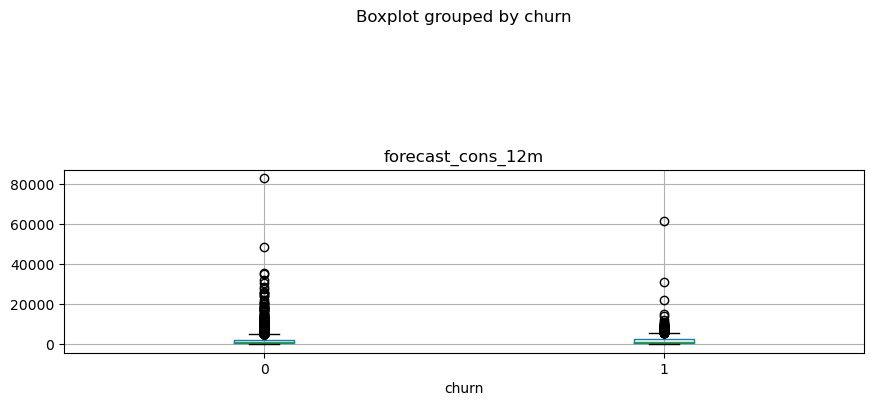

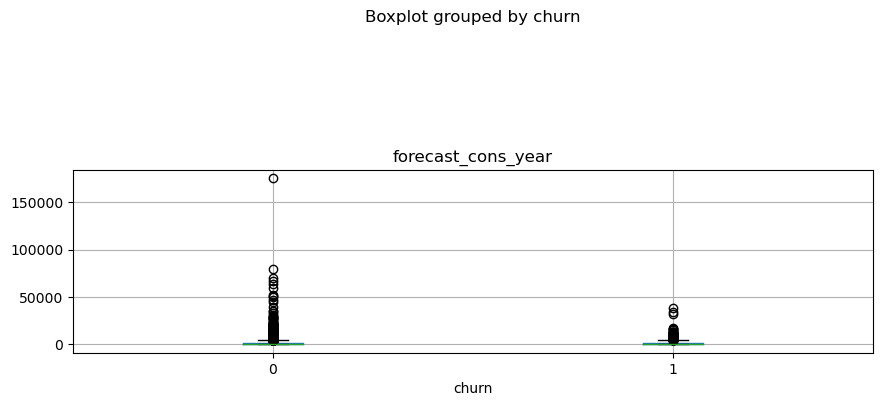

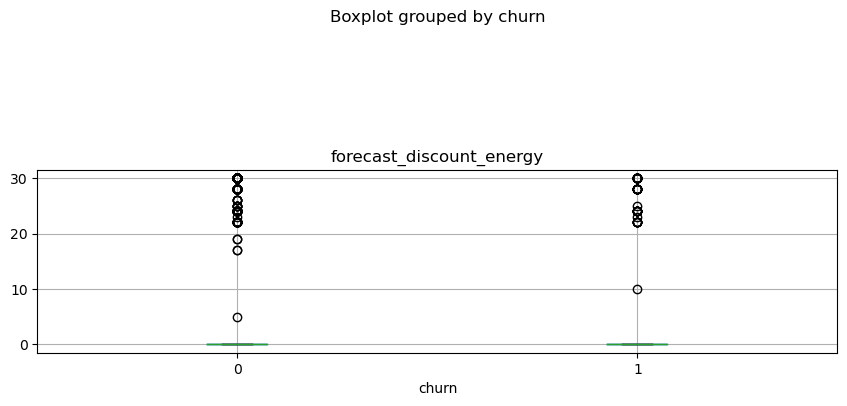

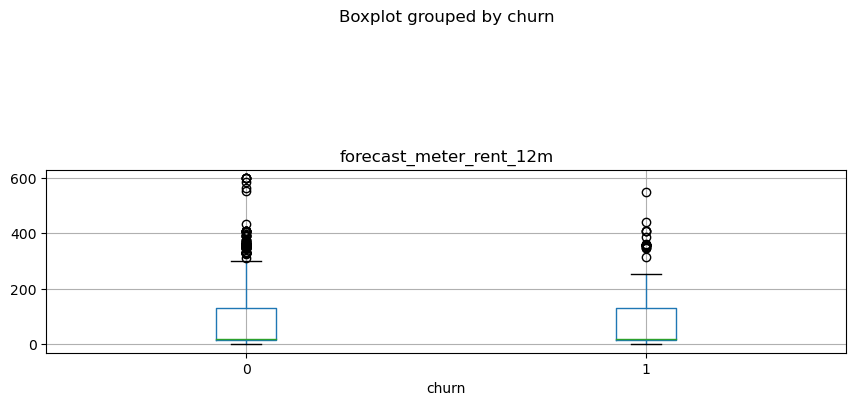

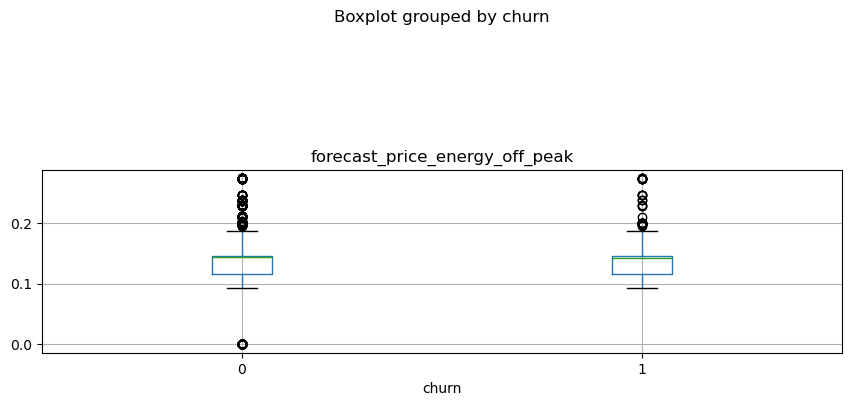

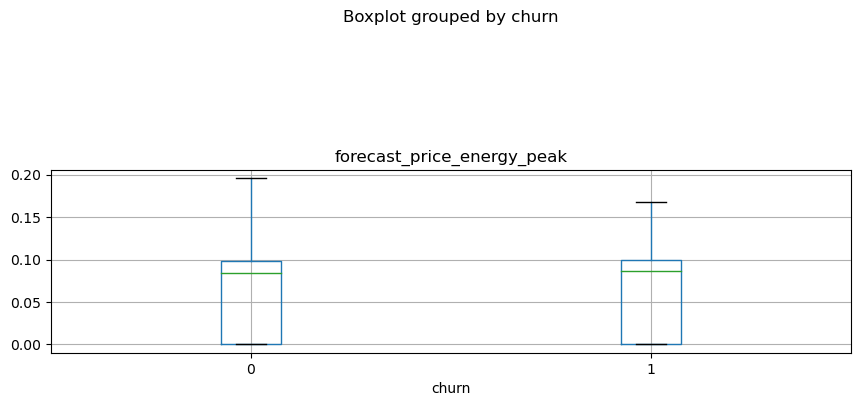

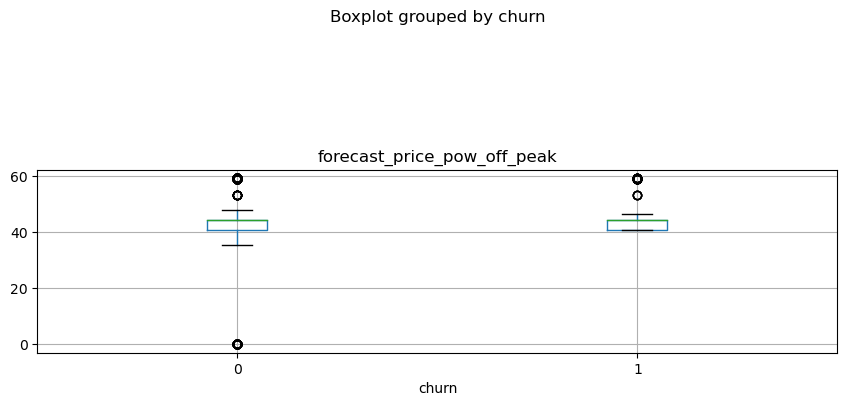

In [33]:
for col in forecast_data:
    client_data.boxplot(column=col, by='churn',layout=(7,1), figsize=(10,20))
    plt.title(col)

    
plt.show()


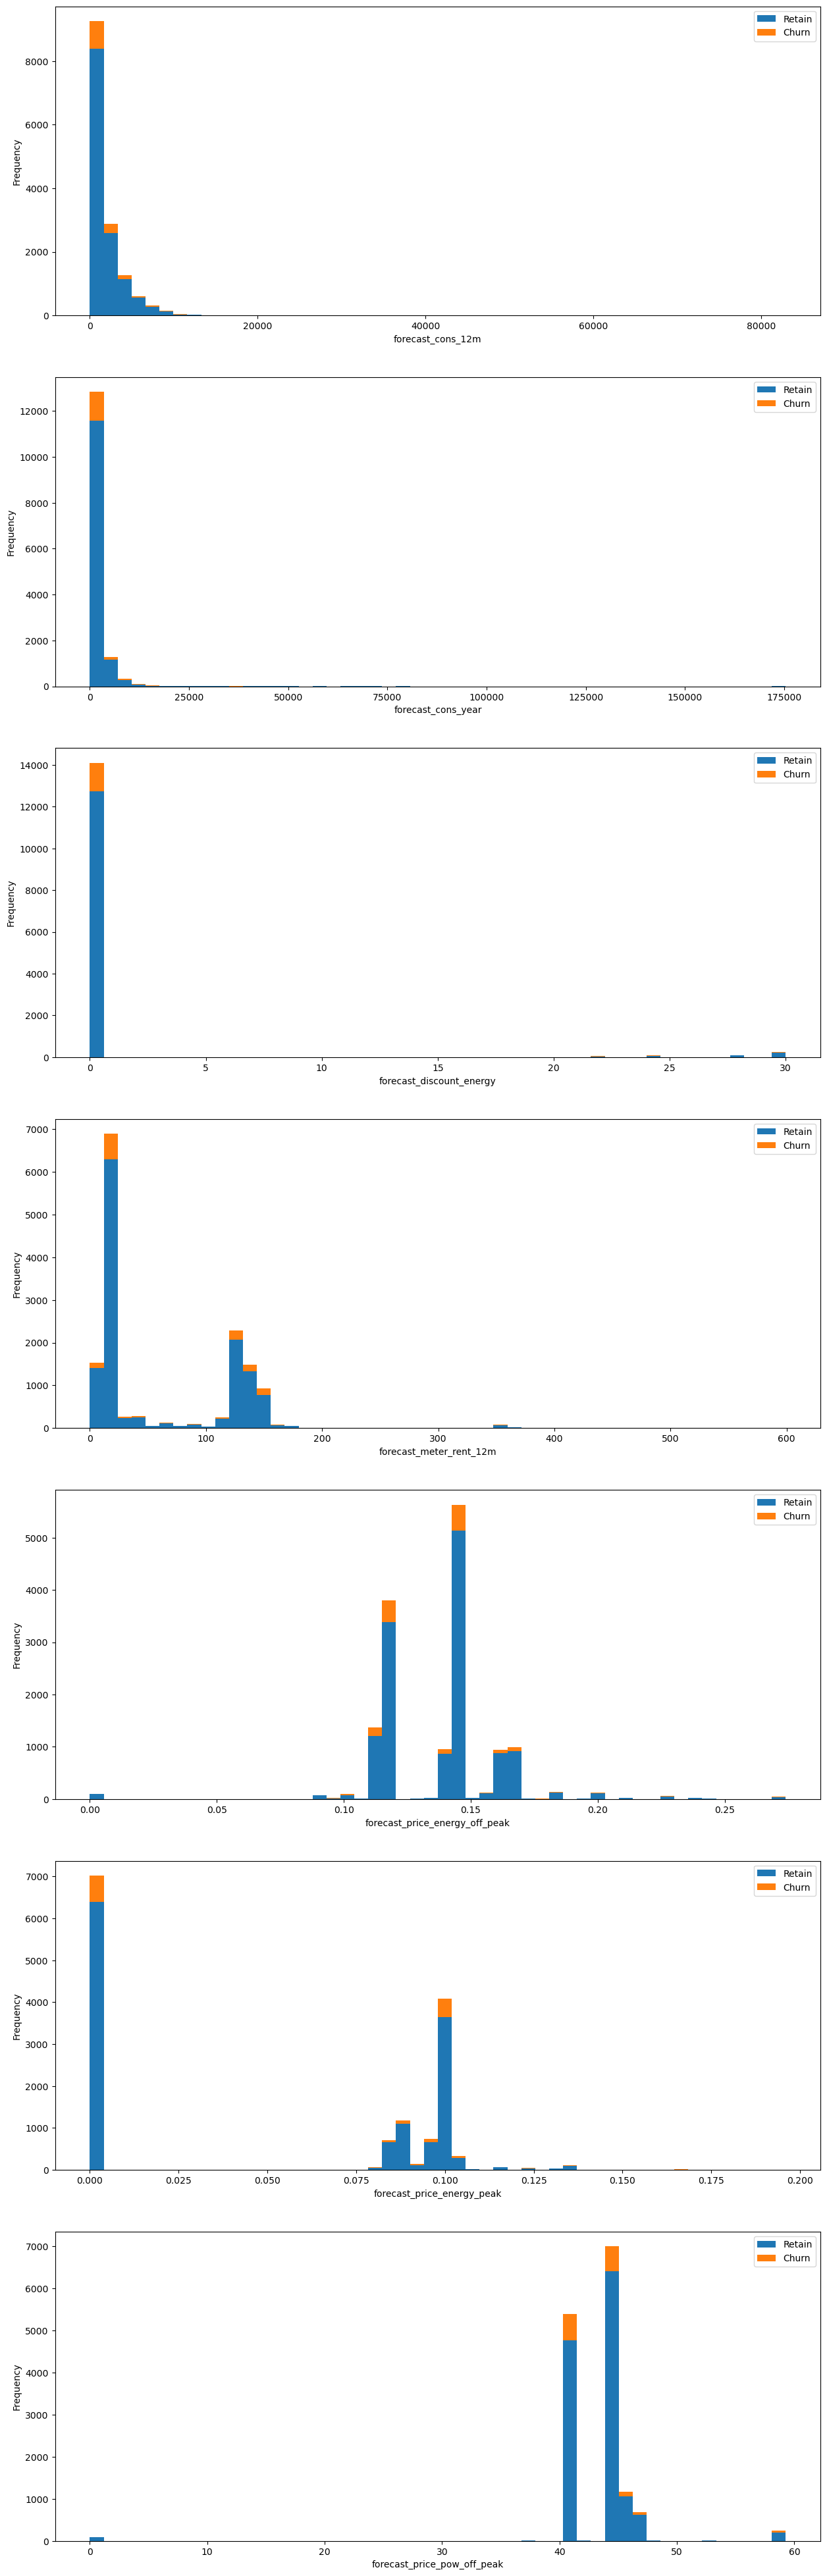

In [34]:
fig, axs = plt.subplots(nrows =7, figsize =(15,50))
plot_distribution(client_data, "forecast_cons_12m", axs[0])
plot_distribution(client_data, "forecast_cons_year", axs[1])
plot_distribution(client_data, "forecast_discount_energy", axs[2])
plot_distribution(client_data, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_data, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_data, "forecast_price_energy_peak", axs[5])
plot_distribution(client_data, "forecast_price_pow_off_peak", axs[6])

plt.show()

#### Customer Lifetime Value

In [35]:
client_data['num_years_antig'].value_counts()

6     4769
4     3982
3     2433
5     2317
7      509
11     185
12     110
8      103
9       92
10      81
13      13
2       11
1        1
Name: num_years_antig, dtype: int64

Text(38.39383333333333, 0.5, 'Customer Count')

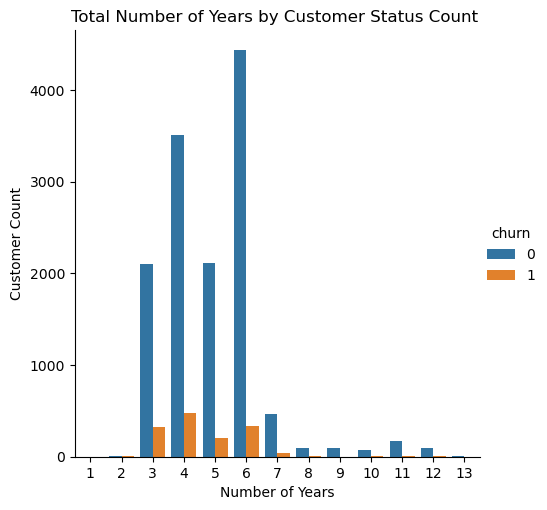

In [36]:
sns.catplot(data = client_data, x='num_years_antig',kind='count',hue='churn')
plt.title('Total Number of Years by Customer Status Count ')
plt.xlabel('Number of Years')
plt.ylabel('Customer Count')

##### Customers who have higher churn rate are customers who stayed with PowerCo for 3-7 years. 

#### Contract Type

In [37]:
contract_type = client_data[["id","has_gas","churn"]]
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
contract_percentage =contract_percentage.round(1)
contract_percentage

churn,0,1
has_gas,,
f,89.9,10.1
t,91.8,8.2


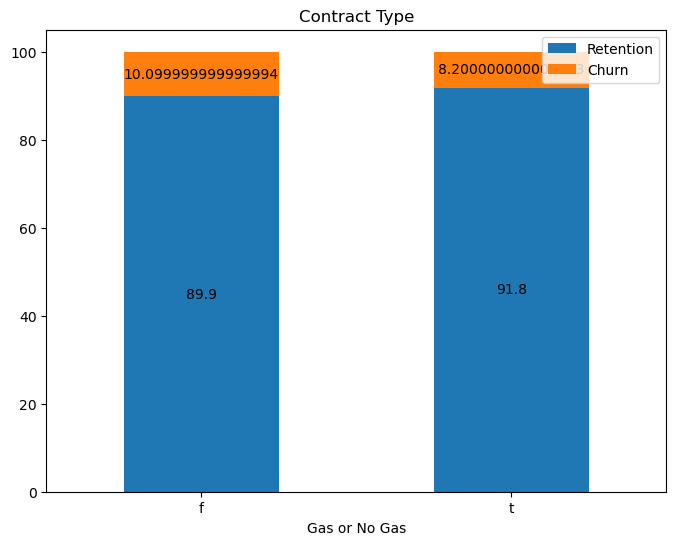

In [38]:
ax = contract_percentage.plot.bar(stacked=True,rot=0,figsize=(8, 6))
ax.set_xlabel('Gas or No Gas')
plt.legend(['Retention','Churn'],loc='upper right')
ax.set_title('Contract Type')

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
   


#### Amount of Active Products/Service Subscribed

In [39]:
client_data['nb_prod_act'].value_counts()

1     11431
2      2445
3       523
4       150
5        31
9        11
6         8
8         4
10        2
32        1
Name: nb_prod_act, dtype: int64

In [40]:
prod_cust_state = client_data[['nb_prod_act','churn']]

Text(39.43886458333333, 0.5, 'Customer Count')

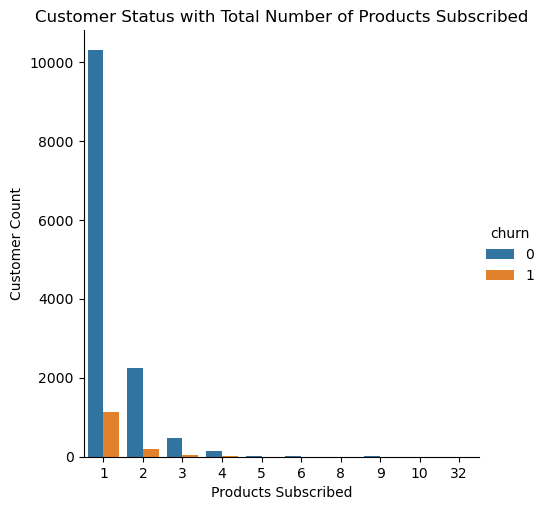

In [41]:
sns.catplot(data =prod_cust_state, x='nb_prod_act',kind='count',hue='churn')
plt.title('Customer Status with Total Number of Products Subscribed')
plt.xlabel('Products Subscribed')
plt.ylabel('Customer Count')

#### Power Subscription

In [42]:
client_data['pow_max'].value_counts()

13.200    2124
10.392    2000
13.856    1504
15.000     583
10.350     480
          ... 
19.410       1
11.540       1
55.360       1
17.570       1
48.078       1
Name: pow_max, Length: 698, dtype: int64

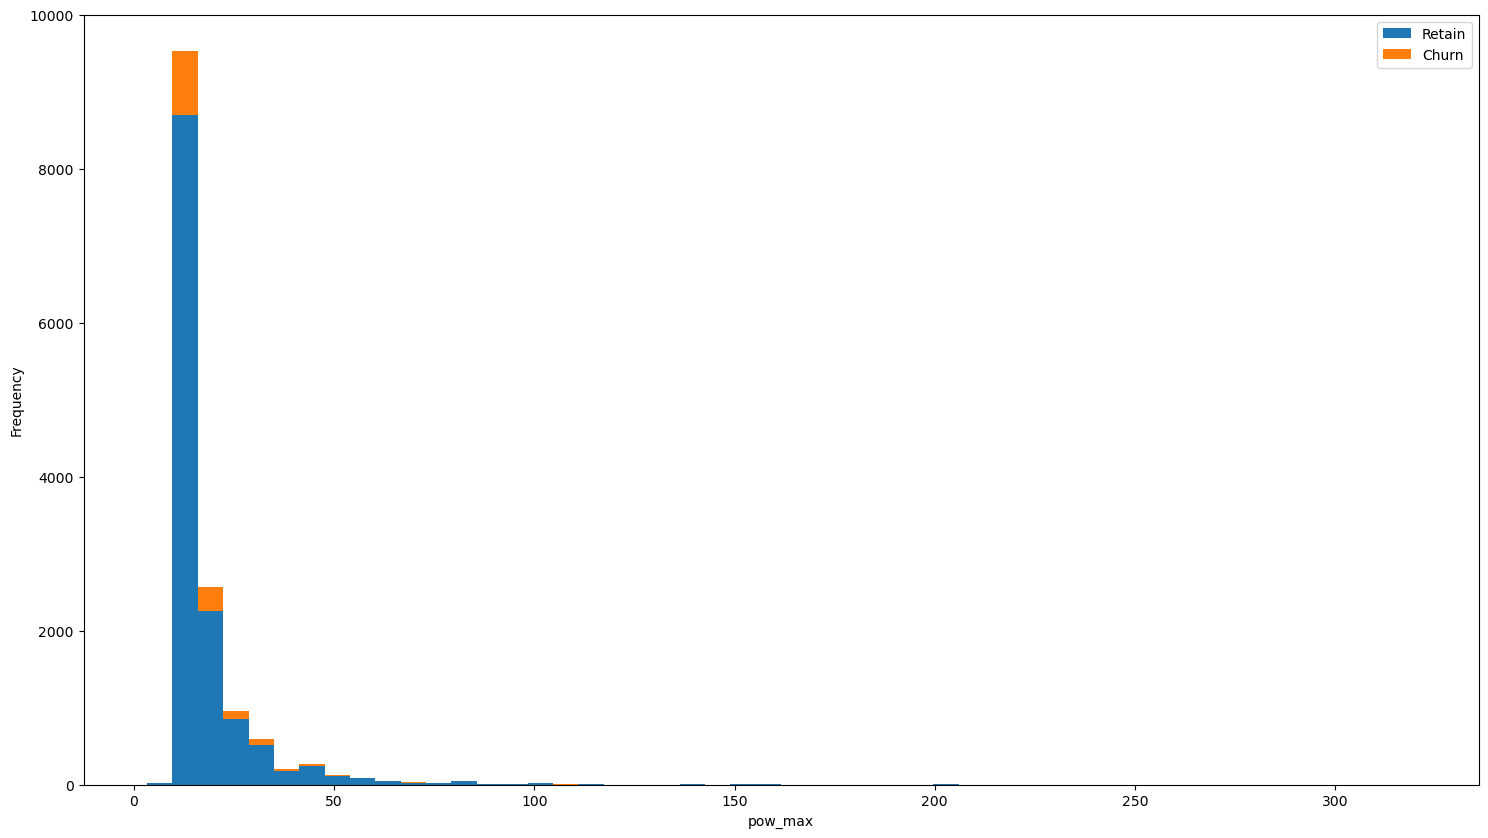

In [43]:
power = client_data[["id", "pow_max", "churn"]]
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

### Margin

In [44]:
total_net_margin = client_data['net_margin'].sum()
gross_margin_power_subscriptions = client_data['margin_gross_pow_ele'].sum()
net_margin_power_subscriptions = client_data['margin_net_pow_ele'].sum()
total_customers = client_data['id'].count()

print('Total Net Margin:',total_net_margin)
print('Gross Margin on Power Subscriptions:',gross_margin_power_subscriptions)
print('Net Margin on Power Subscriptions:',net_margin_power_subscriptions)
print('Total Number of Customers:',total_customers)

Total Net Margin: 2757299
Gross Margin on Power Subscriptions: 351857
Net Margin on Power Subscriptions: 351819
Total Number of Customers: 14606


#### Gross Margin Rate

In [45]:
#Gross Margin Rate = Net Margin on Power Subscriptions / Revenue on Power Subscriptions
gross_margin_rate = (net_margin_power_subscriptions/(gross_margin_power_subscriptions+net_margin_power_subscriptions))
print('Gross Margin Rate:',gross_margin_rate)

Gross Margin Rate: 0.4999729989370108


#### Revenue Generated by Power Subscriptions

In [46]:
#Revenue on Power Subscriptions = Net Margin on Power Subscriptions / Gross Margin Rate
revenue_power_subscriptions = (net_margin_power_subscriptions/gross_margin_rate)

print('Revenue of Power Subscriptions:',revenue_power_subscriptions)

Revenue of Power Subscriptions: 703676.0


#### Total Revenue of The Company

In [47]:
#Revenue = Total Net Margin / Gross Margin Rate
company_revenue = (total_net_margin/gross_margin_rate)
print('The company revenue is approximately:',company_revenue)

The company revenue is approximately: 5514895.816098618


#### Customer Lifetime Value of Each Customer 

In [48]:
#Convert churn percentage to 9.71% to churn rate, 0.097
churn_rate = 0.097
clv = (((company_revenue/total_customers)*gross_margin_rate)/churn_rate)

print('Estimated lifetime value of each customer is:',clv)

Estimated lifetime value of each customer is: 1946.1702647266832


In [49]:
#Create a new column for gross margin rate for each customer
client_data['gross_m_rate']=client_data['margin_net_pow_ele']/(client_data['margin_gross_pow_ele']+client_data['margin_net_pow_ele'])

In [50]:
#Create a new column, revenue power subscriptions for each customer
client_data['revenue_p_sub'] = client_data['margin_net_pow_ele']/client_data['gross_m_rate']

In [51]:
#Convert churn percentage to 9.71% to churn rate, 0.097
churn_rate = 0.097

#Create a new column,count the CLV value for each customer
client_data['lifetime_value'] = ((company_revenue/total_customers)*client_data['gross_m_rate']/churn_rate)

In [52]:
client_data['lifetime_value'].isnull().value_counts()

False    14198
True       408
Name: lifetime_value, dtype: int64

In [53]:
 client_data['lifetime_value'].value_counts()

1946.275368    14196
1833.680925        1
714.958298         1
Name: lifetime_value, dtype: int64

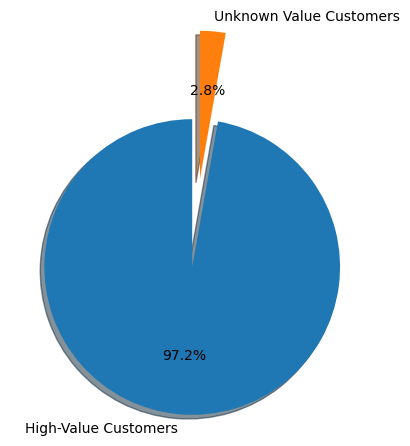

In [54]:
x = [97.20, 2.79]
mylabels = ['High-Value Customers', 'Unknown Value Customers']
myexplode = [0.2, 0.4,]

plt.pie(x, labels = mylabels, explode = myexplode, shadow = True , autopct='%1.1f%%',startangle=90)
plt.show()

Text(0, 0.5, 'Num of Years')

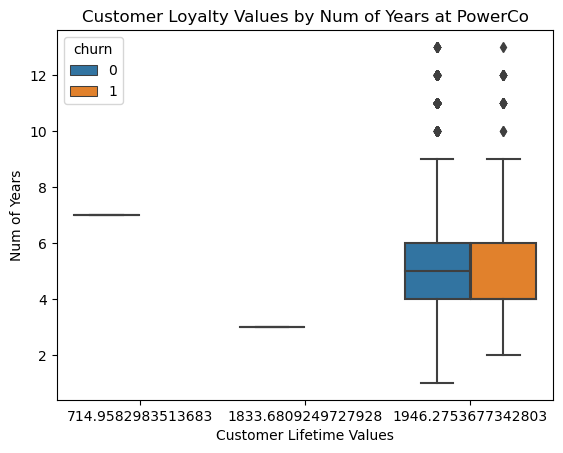

In [55]:
sns.boxplot(data = client_data, x='lifetime_value', y ='num_years_antig',hue='churn')
plt.title('Customer Loyalty Values by Num of Years at PowerCo')
plt.xlabel('Customer Lifetime Values')
plt.ylabel('Num of Years')

#### Price Data

In [56]:
price_data['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

In [57]:
price_data['id'].value_counts().value_counts()

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

In [58]:
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

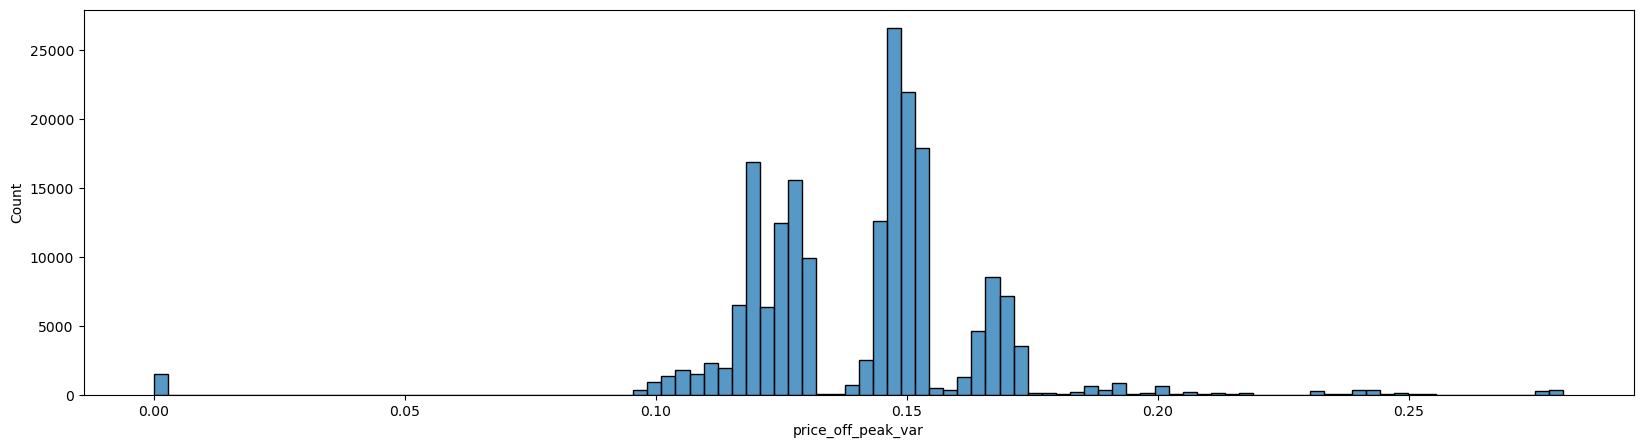

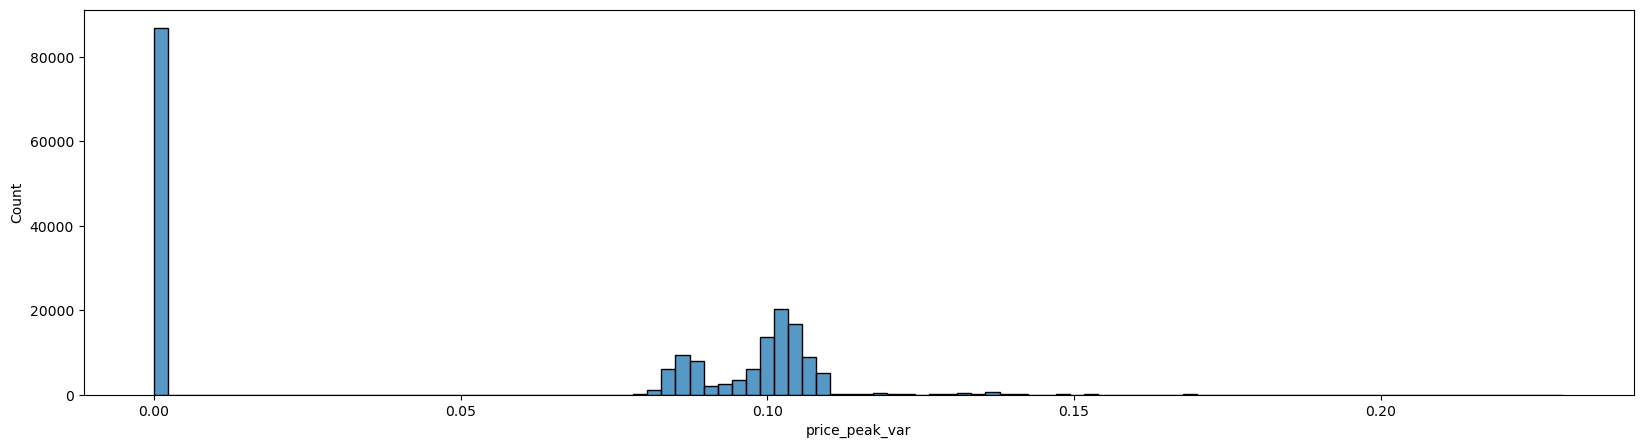

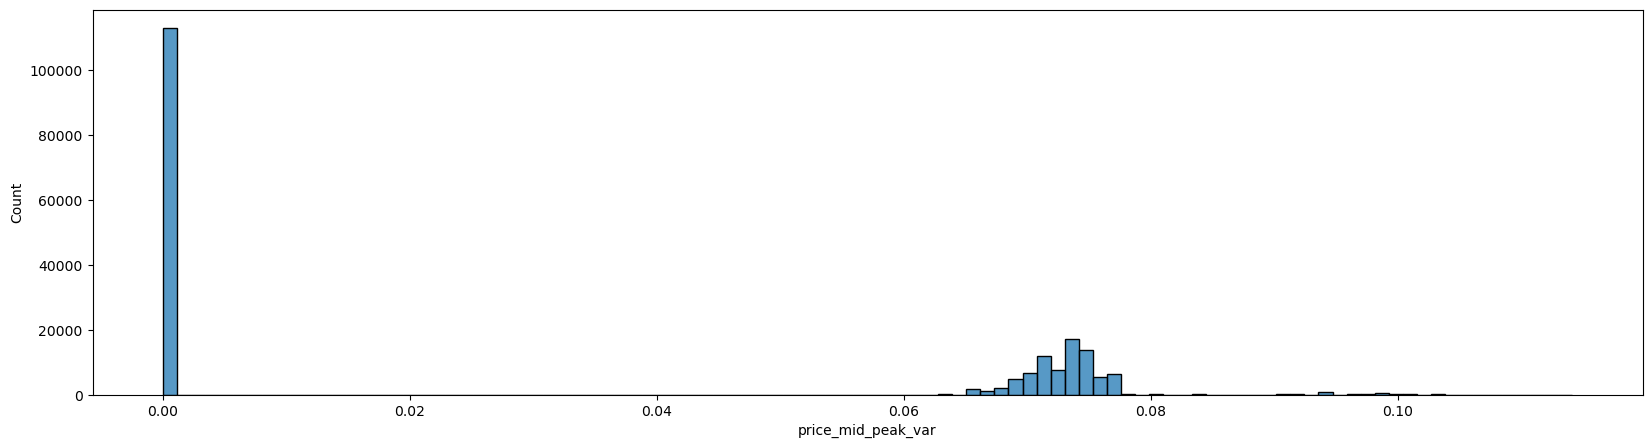

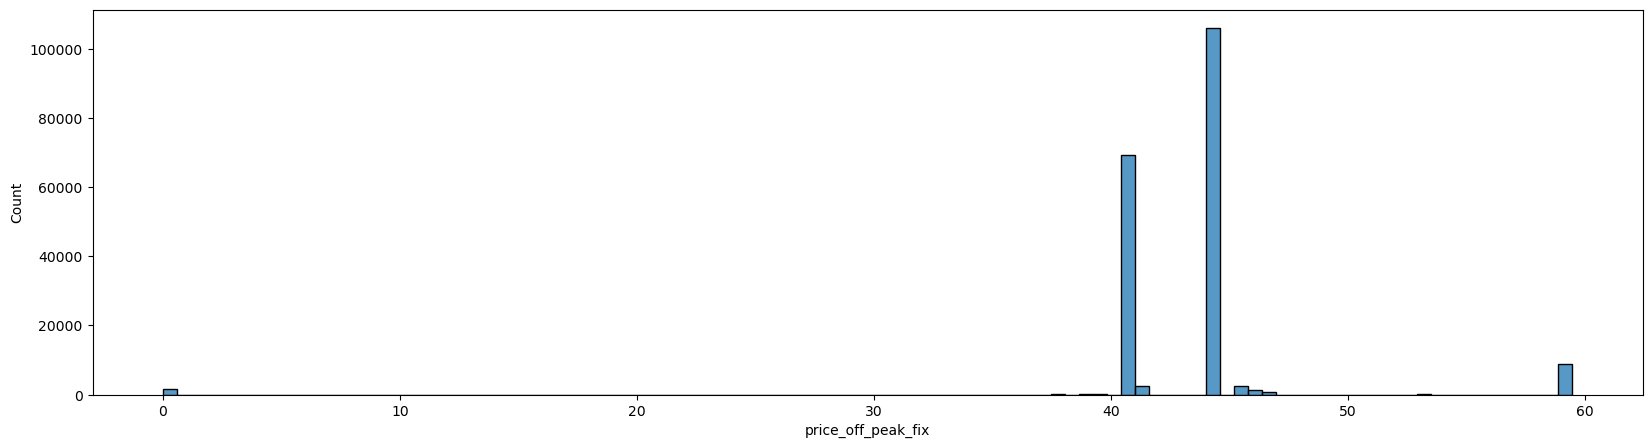

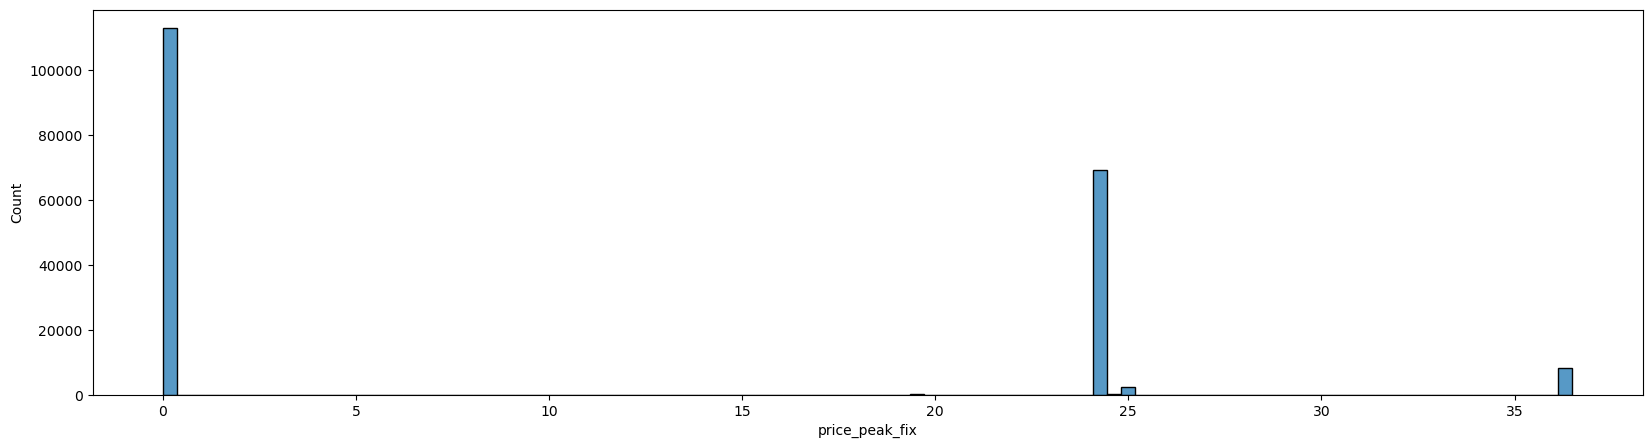

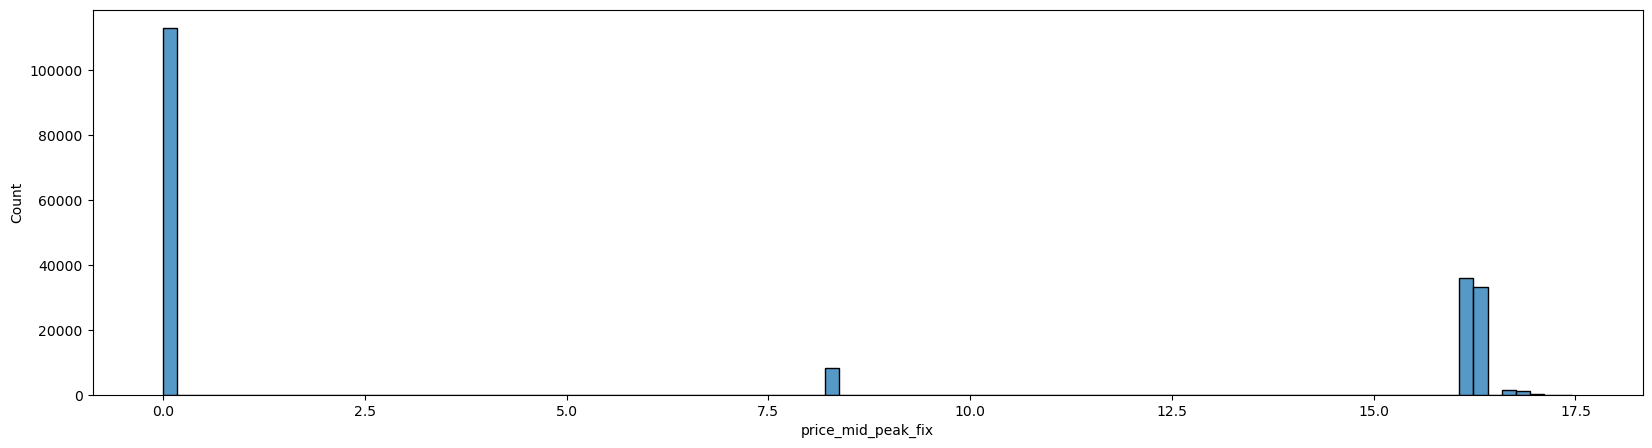

In [59]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_data, target_variable=attr, if_churn=False)

In [60]:
#Create mean data for price data
mean_year = price_data.groupby(['id']).mean().reset_index()
mean_half_year = price_data[price_data['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_quatile = price_data[price_data['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

mean_year.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [61]:
#rename the columns of mean year
mean_year = mean_year.rename(

    columns={
        'price_off_peak_var': 'mean_year_price_off_peak_var',
        'price_peak_var': 'mean_year_price_peak_var',
        'price_mid_peak_var': 'mean_year_price_mid_peak_var',
        'price_off_peak_fix': 'mean_year_price_off_peak_fix',
        'price_peak_fix': 'mean_year_price_peak_fix',
        'price_mid_peak_fix': 'mean_year_price_mid_peak_fix'
    }
)

mean_year['mean_year_price_off_peak'] = mean_year['mean_year_price_off_peak_var'] + mean_year['mean_year_price_off_peak_fix']
mean_year['mean_year_price_peak'] = mean_year['mean_year_price_peak_var'] + mean_year['mean_year_price_peak_fix']
mean_year['mean_year_price_med_peak'] = mean_year['mean_year_price_mid_peak_var'] + mean_year['mean_year_price_mid_peak_fix']

In [62]:
#rename the columns of mean half year
mean_half_year = mean_half_year.rename(

    columns={
        'price_off_peak_var': 'mean_half_year_price_off_peak_var',
        'price_peak_var': 'mean_half_year_price_peak_var',
        'price_mid_peak_var': 'mean_half_year_price_mid_peak_var',
        'price_off_peak_fix': 'mean_half_year_price_off_peak_fix',
        'price_peak_fix': 'mean_half_year_price_peak_fix',
        'price_mid_peak_fix': 'mean_half_year_price_mid_peak_fix'
    }
)

mean_half_year['mean_half_year_price_off_peak'] = mean_half_year['mean_half_year_price_off_peak_var'] + mean_half_year['mean_half_year_price_off_peak_fix']
mean_half_year['mean_half_year_price_peak'] = mean_half_year['mean_half_year_price_peak_var'] + mean_half_year['mean_half_year_price_peak_fix']
mean_half_year['mean_half_year_price_med_peak'] = mean_half_year['mean_half_year_price_mid_peak_var'] + mean_half_year['mean_half_year_price_mid_peak_fix']

In [63]:
#rename the columns of mean quatile
mean_quatile = mean_quatile.rename(

    columns={
        'price_off_peak_var': 'mean_quatile_price_off_peak_var',
        'price_peak_var': 'mean_quatile_price_peak_var',
        'price_mid_peak_var': 'mean_quatile_price_mid_peak_var',
        'price_off_peak_fix': 'mean_quatile_price_off_peak_fix',
        'price_peak_fix': 'mean_quatile_price_peak_fix',
        'price_mid_peak_fix': 'mean_quatile_price_mid_peak_fix'
    }
)

mean_quatile['mean_quatile_price_off_peak'] = mean_quatile['mean_quatile_price_off_peak_var'] + mean_quatile['mean_quatile_price_off_peak_fix']
mean_quatile['mean_quatile_price_peak'] = mean_quatile['mean_quatile_price_peak_var'] + mean_quatile['mean_quatile_price_peak_fix']
mean_quatile['mean_quatile_price_med_peak'] = mean_quatile['mean_quatile_price_mid_peak_var'] + mean_quatile['mean_quatile_price_mid_peak_fix']

In [64]:
# Merge into 1 dataframe
price_df = pd.merge(mean_year, mean_half_year, on='id')
price_df = pd.merge(price_df, mean_quatile, on='id')

In [65]:
price_df.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,...,mean_half_year_price_med_peak,mean_quatile_price_off_peak_var,mean_quatile_price_peak_var,mean_quatile_price_mid_peak_var,mean_quatile_price_off_peak_fix,mean_quatile_price_peak_fix,mean_quatile_price_mid_peak_fix,mean_quatile_price_off_peak,mean_quatile_price_peak,mean_quatile_price_med_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [66]:
#Merge the price df with churn variable to check whether price sensitivity has any correlation with churn.

price_churn = pd.merge(price_df, client_data[['id', 'churn']], on='id')
price_churn.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,...,mean_quatile_price_off_peak_var,mean_quatile_price_peak_var,mean_quatile_price_mid_peak_var,mean_quatile_price_off_peak_fix,mean_quatile_price_peak_fix,mean_quatile_price_mid_peak_fix,mean_quatile_price_off_peak,mean_quatile_price_peak,mean_quatile_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


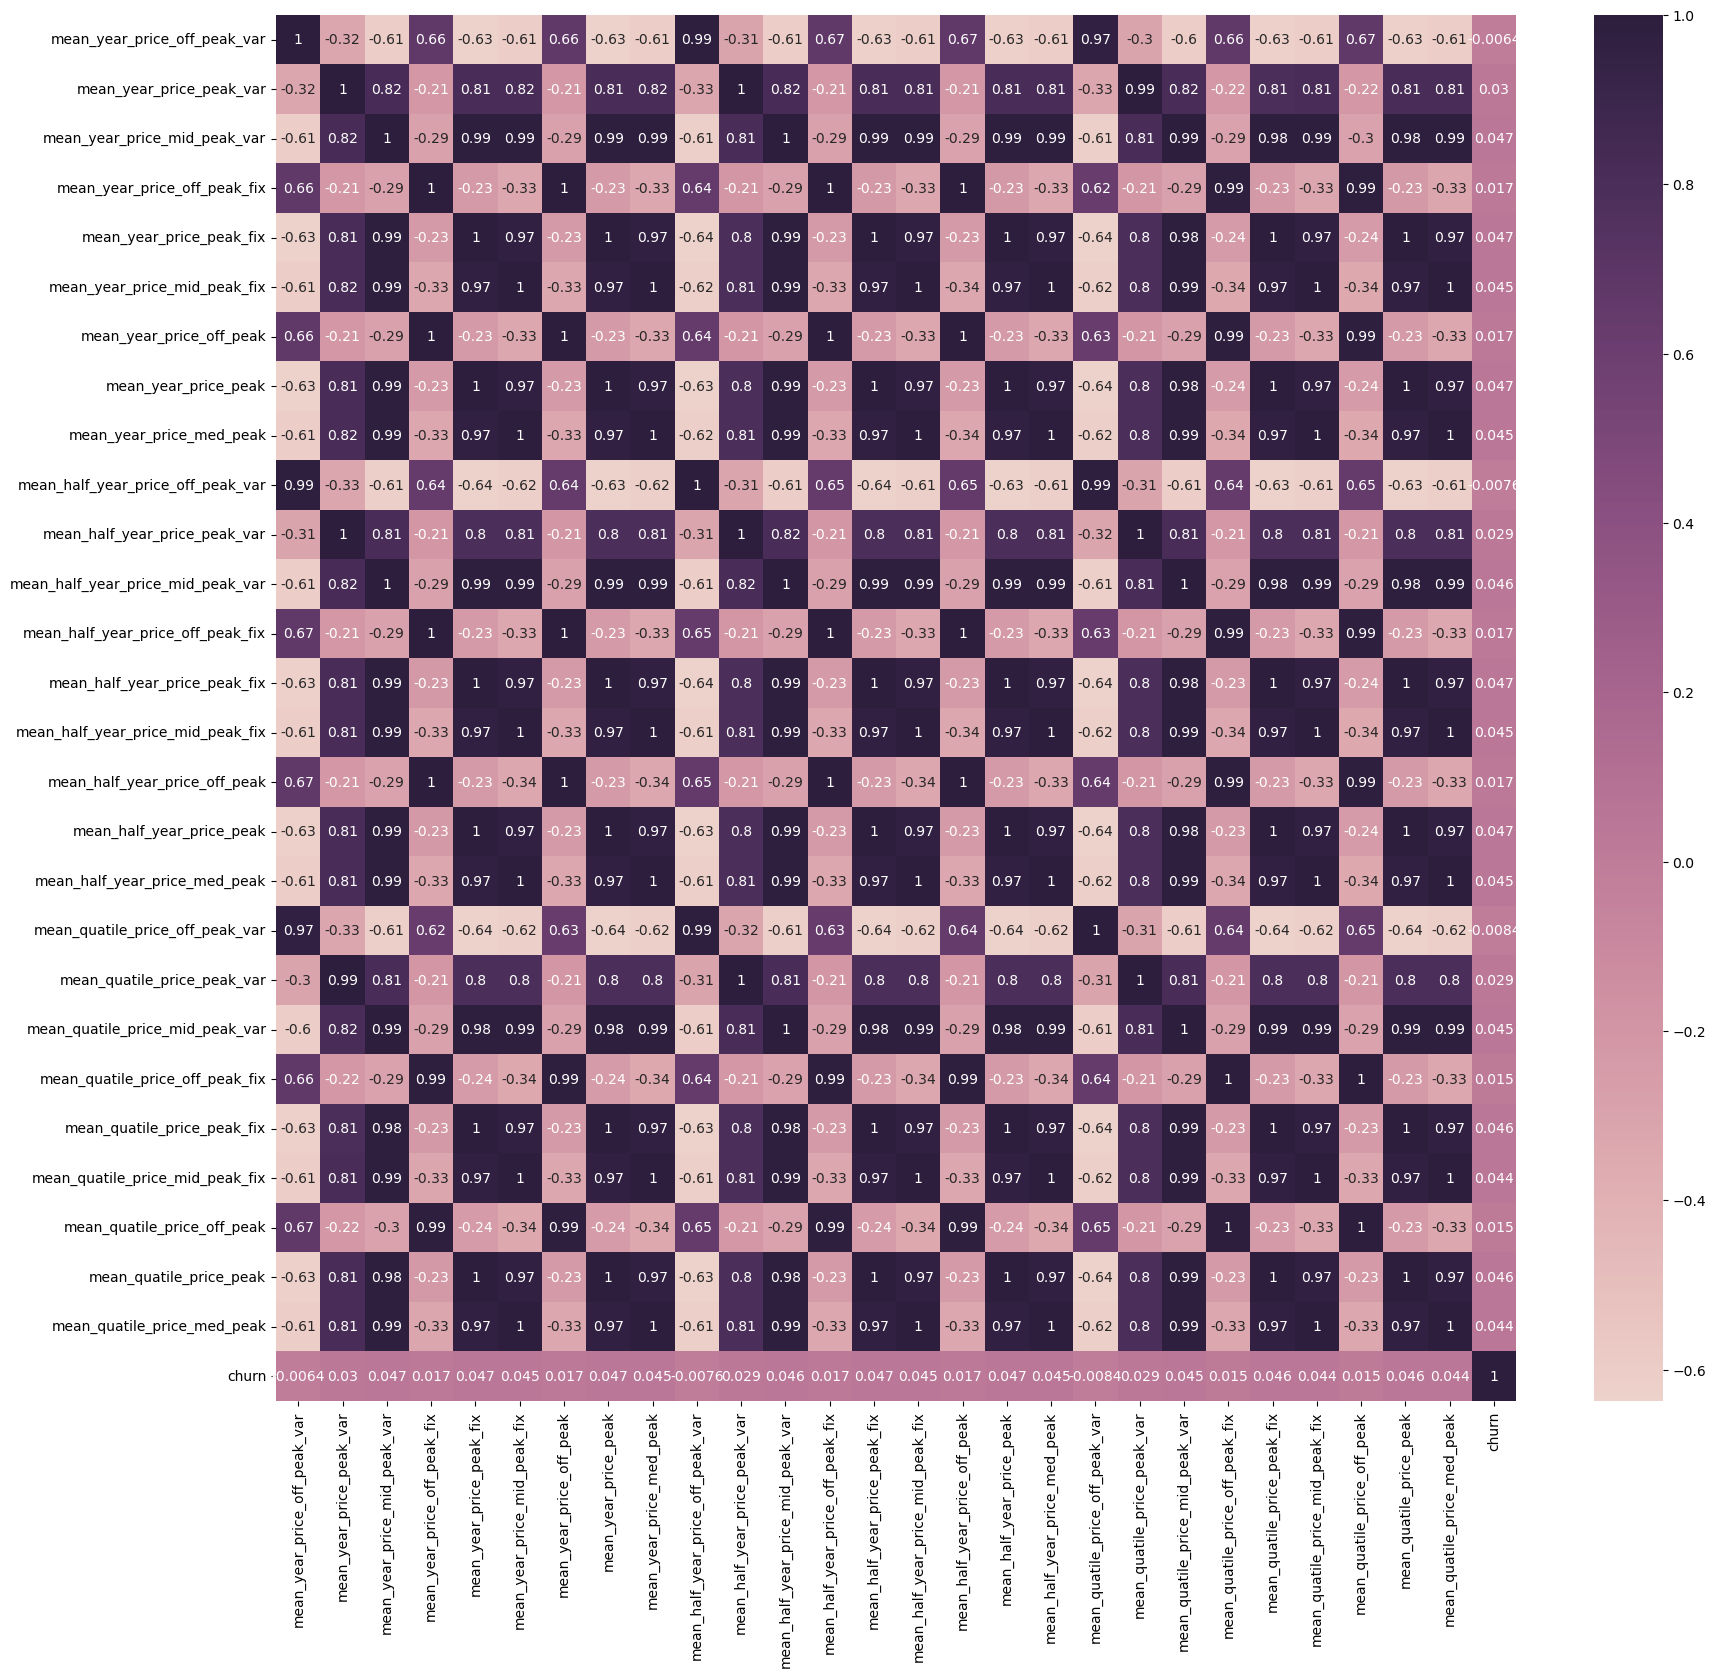

In [67]:
corr = price_churn.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=sns.cubehelix_palette(as_cmap=True), annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Hypothesis

Therefore,the hypothesis of customer churned due to price changes is not true; the relationship between the two variables being studied have low correlation between customers churn and the prices.

In [68]:
churn_df = pd.merge(client_data.drop(columns=['churn']), price_churn, on='id')

In [69]:
churn_df.to_csv('cleaned_data.csv')